# Homework 8 - Q7

We will now generate some random points, using a Points class that I wrote.

We will also use the `random` class that is made available in Python.

In [24]:
from Points import Point
import random as rd

Now, we will choose how many points to plot: (Try out with different numbers)

In [25]:
how_many = 10

Next, we will actually generate some random points, using the function `random.randint(0,10)`, which will basically enable us to create a random number in the range (0,9). (10 is excluded)

We will append those points to a list, and then print that list

In [26]:
t = []
for i in range(how_many):
    if i==0:
        t.append(Point([rd.randint(0,10),rd.randint(0,10)]))
    else:
        t.append(Point([rd.randint(1,10),rd.randint(1,10)])+t[i-1])

for i in t:
    print(i)

[4,4]
[7,8]
[17,10]
[24,15]
[34,18]
[44,27]
[54,36]
[59,37]
[67,43]
[74,45]


For the next step, we need to create a list of variables. For this, I took some help from [here](https://ask.sagemath.org/question/7925/a-list-of-symbolic-variables/).

In this process, we create `n` variables to fit an $(n-1)^{th}$ degree equation, given $n$ points.

In [27]:
s = list(var('a_%d' % i) for i in range(how_many))

Next, we want to create Sage expressions that will equate the value of the function evaluated at a certain `x` with the corresponding value of `y`.

In [28]:
expr = []
for i in range(how_many):
    ex = t[i][0]
    y = t[i][1]
    expr_str = ""
    for j in range(how_many):
        if j==(how_many-1):
            expr_str+="s[%d]*ex**(%d)-y==0" % (j,j)
        else:
            expr_str+="s[%d]*ex**(%d)+" % (j,j)
    expr.append(eval(expr_str))

We now have all our expressions in `expr`, and all our variables in `s`. Then all we need to do is solve the equation, and then take the `rhs()` of each of them, and send them to a new list.

In [29]:
Soln = solve(expr,s)
soln_expr = []
for i in Soln[0]:
    soln_expr.append(i.rhs())

Next, we need to create the plot, which also contains numerical parts, which is why we need to evaluate them using the `eval()` command. So, that's what we do:

In [30]:
plot_str=""
for i in range(len(soln_expr)):
    if i==len(soln_expr)-1:
        plot_str += str(float(soln_expr[i]))+"*x**"+str(i)
    else:
        plot_str += str(float(soln_expr[i]))+"*x**"+str(i)+"+0"

plot_expr = eval(plot_str)
plot_expr.show()

(4.2843840359225373e-13)*x^9 - (2.5012941610920296e-10)*x^8 + (5.264801351886396e-08)*x^7 - (5.613855237002868e-06)*x^6 + 0.00034081125029892785*x^5 - 0.012231906668307634*x^4 + 0.25723537732123386*x^3 - 3.001017336892641*x^2 + 17.573233615924202*x - 31.935195789026746

Now, we have our final `plot_expr`, which we will plot using the plot command. We also plot the random points we had generated, and the line joining the points.

This is the final result:

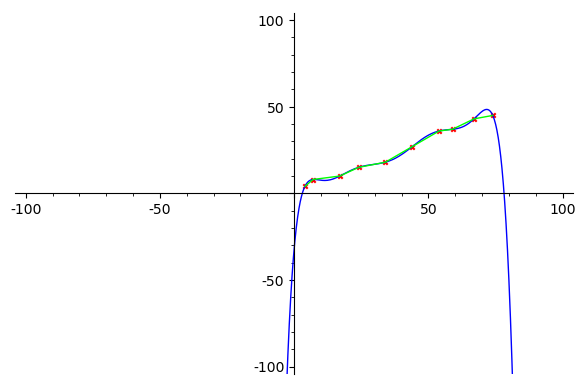

In [33]:
p1 = plot(plot_expr,(x,-100,100),ymin=-100,ymax=100)
p2 = line(t,rgbcolor=(0,1,0))
p3 = point(t,rgbcolor=(1,0,0),marker='x')
z = p3+p1+p2
z.show()